# Lab 4: Approximation
**Theo Puranen Åhfeldt**

# **Abstract**

TODO

# **Set up environment**

To have access to the neccessary modules you have to run this cell.

In [192]:
# Load neccessary modules.
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# **Introduction**

TODO

# **Method**

Numpy arrays are used to represent vectors and matrices. TODO

## L2 projection to pw linear approximation over mesh in 1D

To compute the $L^2$ projection we will need to compute:

$$(f, \phi_i) = \int_a^b f(x)\phi_i(x) dx = \int_{I_i} f(x)\phi_i(x) dx + \int_{I_{i+1}} f(x)\phi_i(x) dx$$

Since $f$ can be any function it is not possible to come up with a general analytical solution. Therefor we will use a numerical approach and compute the integrals using Riemann sums.

In [239]:
def riemann_sum(f, start, stop, num):
    dx = (stop - start)/num
    xs = np.linspace(start + dx/2, stop - dx/2, num)
    return np.sum(f(xs)*dx)

def integrate_vector(f, k, i, xs):
    prod = lambda x: f(x)*(x - xs[k + 1 - i])/(xs[k + i] - xs[k + 1 - i])
    return integrate.quad(prod, xs[k], xs[k + 1])[0]

For simplicity we will only use uniform subdivisions, which means that every subinterval will be of length $h = m^{-1}$ where $m$ is the number of subintervals. The integration corresponding to $(\phi_i, \phi_j)$ will then be equal to $\frac{1}{6m}$ when $|i - j| = 1$ and $\frac{2}{3m}$ when $i = j$, by the calculations (9.17-19) from the lecture notes.

#consider projections over $L^2([0,1])$, and always

We make the matrix $A$ and vector $b$ one larger then necessary in order to not have to worry about the edge case of adding the values for the first interval.

In [249]:
def integrate_matrix(k, i ,j, xs):
    h = xs[k + 1] - xs[k]
    return h/3 if i == j else h/6

def assembly_system(f, xs):
    n = len(xs)
    A = np.zeros((n, n))
    b = np.zeros(n)
    for k in range(n - 1):
        q = 2
        A_loc = np.zeros((q, q))
        b_loc = np.zeros(q)
        for i in range(q):
            b_loc[i] = integrate_vector(f, k, i, xs)
            for j in range(q):
                A_loc[i,j] = integrate_matrix(k, i, j, xs)
        b[k:k+q] += b_loc
        A[k:k+q, k:k+q] += A_loc
    return A, b

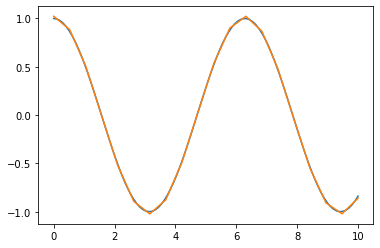

In [250]:
def L2_projection(f, xs):
    A, b = assembly_system(f, xs)
    return np.linalg.solve(A, b)

xs = np.linspace(0,10,20)
xss = np.linspace(0,10,100)

f = lambda x: np.cos(x)
alpha = L2_projection(f, xs)

plt.plot(xss, f(xss))
plt.plot(xs, alpha)

### Tests

TODO

# **Results**

The following code cell runs all test and shows that the implementions are successful:

# **Discussion**

TODO